In [78]:
graph_matrix = [
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
]

In [79]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)

    print(start+1)

    for next_node, connected in enumerate(graph[start]):
        if connected and next_node not in visited:
            dfs(graph, next_node, visited)
    return visited

print("DFS:")
dfs(graph_matrix, 0)


DFS:
1
6
3
2
4
5
9
8
13
18
10
14
17
7
11
15
20
19
12
16


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [80]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        node = queue.popleft()
        print(node+1)

        for next_node, connected in enumerate(graph[node]):
            if connected and next_node not in visited:
                queue.append(next_node)
                visited.add(next_node)

print("BFS:")
bfs(graph_matrix,0)


BFS:
1
6
9
3
8
16
2
4
5
13
19
18
12
10
17
14
7
11
15
20


In [81]:
def bfs_find(graph_matrix):
    lv = [0, 0]
    lp = [[], []] 

    for start_node in range(len(graph_matrix)):
        visited = [False] * len(graph_matrix)
        queue = deque()
        queue.append(start_node)
        visited[start_node] = True
        result = []

        while queue:
            node = queue.popleft()
            result.append(node+1)

            for i, value in enumerate(graph_matrix[node]):
                if value == 1 and not visited[i]:
                    queue.append(i)
                    visited[i] = True

        if len(result) > len(lp[0]):
            lp[1] = lp[0]
            lp[0] = result
            lv[1] = lv[0]
            lv[0] = start_node
        elif len(result) > len(lp[1]):
            lp[1] = result
            lv[1] = start_node

    return lv, lp

import time

start_time = time.time()
lv, lp = bfs_find(graph_matrix)
end_time = time.time()
bfs_time = end_time - start_time

print("Самые большие вершины и их пути (BFS):")
print(lv, lp)
print("Время выполнения BFS: {:.10f} секунд".format(bfs_time))

Самые большие вершины и их пути (BFS):
[0, 1] [[1, 6, 9, 3, 8, 16, 2, 4, 5, 13, 19, 18, 12, 10, 17, 14, 7, 11, 15, 20], [2, 3, 4, 5, 6, 1, 9, 8, 16, 13, 19, 18, 12, 10, 17, 14, 7, 11, 15, 20]]
Время выполнения BFS: 0.0021238327 секунд


Да, в Python существуют стандартные библиотеки, которые предоставляют функции для обхода графов в ширину (BFS) и в глубину (DFS). Они реализованы в библиотеке networkx
Пример:

In [82]:
import networkx as nx
import numpy as np

# Создаем граф
G = nx.DiGraph()

for i in range(len(graph_matrix)):
    G.add_node(i)

for i in range(len(graph_matrix)):
    for j in range(len(graph_matrix[i])):
        if graph_matrix[i][j] == 1:
            G.add_edge(i, j)

# Обход в глубину
dfs_path = list(nx.dfs_tree(G, source=0))
print("DFS Path:", dfs_path)

# Обход в ширину
bfs_path = list(nx.bfs_tree(G, source=0))
print("BFS Path:", bfs_path)


DFS Path: [0, 5, 2, 1, 3, 4, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15]
BFS Path: [0, 5, 8, 2, 7, 15, 1, 3, 4, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19]


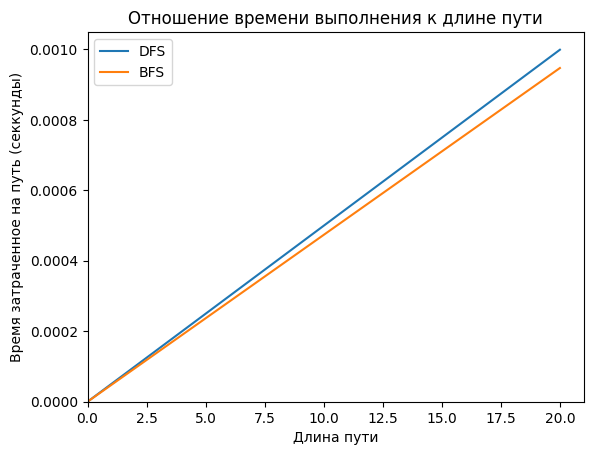

In [3]:
import matplotlib.pyplot as plt

dfs_time = 0.0009470665
bfs_time = 0.0009989738

DFS_Path = [0, 5, 2, 1, 3, 4, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15]
BFS_Path = [0, 5, 8, 2, 7, 15, 1, 3, 4, 12, 18, 17, 11, 9, 16, 13, 6, 10, 14, 19]
times = [0, bfs_time]
paths = [0, len(BFS_Path)]
plt.plot(paths, times)
times = [0, dfs_time]
paths = [0, len(DFS_Path)]
plt.plot(paths, times)
plt. xlim(0)
plt. ylim(0)
plt.xlabel('Длина пути')
plt.ylabel('Время затраченное на путь (секкунды)')
plt.legend(['DFS', 'BFS'])
plt.title('Отношение времени выполнения к длине пути')
plt.show()